### Class 3

1. Hypothesis Tests
    * 1-sample
    * 2-sample
2. Permutation Tests


In [38]:
%run ./ourFunctions.py
%precision 3
cars = pd.read_csv('../data/Auto.csv')
cars4=cars[cars["cylinders"]==4]
np.mean(cars4.mpg)
cars4.shape

(199, 10)

In [36]:
from scipy.stats import norm
norm.ppf(0.95)
norm.cdf(-1.65)
norm.cdf((29.28-30)/5.66*np.sqrt(199) )


0.036

### One-sample Test

We have learned about the **bootstrap** as a slick way of resampling your data to obtain sampling distributions of various measures of interest, 
Without having to learn highly specific distributions (such as the $\chi^2$, Poisson, Binomial or F-distribution) the bootstrap enables us to 


1. get **confidence intervals**
2. perform **one-sample tests**
3. perform **two-sample tests**

Imagine the EPA requiring the average mpg for 4-cylinder cars to be at least $30$ and needs to decide -based on this sample only- whether the manufacturers need to implement some improvements.
In statistical jargon: can the EPA **reject the claim** that the **true mean** is at least 30 ?


**Tasks**
- Test $H_0: \mu \geq 30, H_A: \mu < 30$ for the mean mpg of 4-cylinder cars
    * using bootstrap replicates
    * via standard testing theory.
- Compute the corresponding **p-values**.

29.331

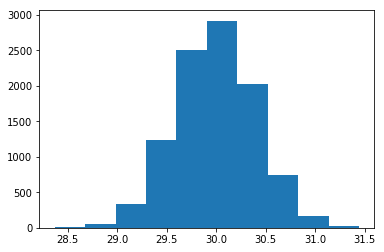

In [43]:
cars4=cars[cars["cylinders"]==4]
#this way of resamplong is great for a CI
#bs_mean_mpg = draw_bs_reps(cars4.mpg,np.mean,10000)

#assume the claim is true !!
empirical_mean = np.mean(cars4.mpg)
#print(empirical_mean)
shift = 30-empirical_mean
#print(shift)
cars4Shifted= cars4.mpg+shift
bs_mean_mpg = draw_bs_reps(cars4Shifted,np.mean,10000)
plt.hist(bs_mean_mpg)
np.percentile(bs_mean_mpg,5)

In [44]:
#p value is simply the left tail beyond xBar
np.sum(bs_mean_mpg < empirical_mean)/10000


378

---------------------------------------------
From Auto to birth weights

From one sample to 2 samples

In [48]:
# birth weight data
bwt = pd.read_csv('../data/BirthWeights.csv', nrows=5000)

bwt.head()

,Unnamed: 0,gender,dbirwt
0,1,male,2551
1,2,male,2778
2,3,female,2976
3,4,female,3345
4,5,female,3175


In [25]:
bwt.shape

(500, 3)

In [26]:
grouped = bwt["dbirwt"].groupby(bwt["gender"])
print(grouped.mean())

gender
female    3452.487705
male      3474.714844
Name: dbirwt, dtype: float64


### A two-sample bootstrap hypothesis test for difference of means

A one sample test compares a data set to one fixed number !

We now want to compare two sets of data, both of which are samples! In particular test the hypothesis that male and female babies have the same biological weight (but not necessarily the same distribution). 

$H_0: \mu_m = \mu_f, H_A: \mu_m \neq \mu_f$

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal (**equal to what value ??**). We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

(array([  24.,  155.,  738., 1891., 2888., 2543., 1297.,  390.,   65.,
           9.]),
 array([-66.516, -52.581, -38.646, -24.711, -10.776,   3.159,  17.094,
         31.029,  44.964,  58.899,  72.834]),
 <a list of 10 Patch objects>)

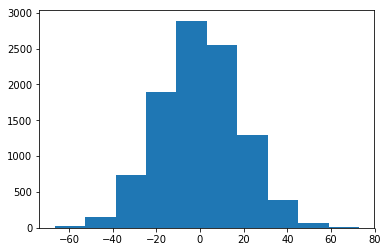

In [49]:
meanNull = np.mean(bwt.dbirwt)# pooled mean
w_m = bwt[bwt["gender"]=="male"].dbirwt
w_f = bwt[bwt["gender"]=="female"].dbirwt
empirical_diff_means = np.mean(w_m)-np.mean(w_f) 
#shift:

w_m_shifted = w_m - np.mean(w_m) + meanNull
w_f_shifted = w_f - np.mean(w_f) + meanNull


# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_m = draw_bs_reps(w_m_shifted, np.mean, 10000)
bs_replicates_f = draw_bs_reps(w_f_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_m - bs_replicates_f

plt.hist(bs_replicates)
# Compute and print p-value: p

In [50]:
print(empirical_diff_means)
#p-value (one-sided):
np.mean(bs_replicates> empirical_diff_means)
#cutoff right tail
np.percentile(bs_replicates, 95)

87.90312328181426


30.275